## Introduction to Regression Splines (with Python codes)

As a beginner in the world of data science, the first algorithm I was introduced to was Linear Regression. I applied it to different datasets and noticed both it’s advantages and limitations.

It assumed a linear relationship between the dependent and independent variables, which was rarely the case in reality. As an improvement over this model, I tried Polynomial Regression which generated better results (most of the time). But using Polynomial Regression on datasets with high variability chances to result in over-fitting.

My model always became too flexible, which does not work well with unseen data. I then came across another non-linear approach known as Regression Splines. It uses a combination of linear/polynomial functions to fit the data.

In this article, we will go through some basics of linear and polynomial regression and study in detail the meaning of splines and their implementation in Python.

Note: To fully understand the concepts covered in this article, knowledge of linear and polynomial regression is required. You can learn more about them here.

Let’s get started!


## Table of Contents
•Understanding the Data

•Quick Review of Linear Regression

•Polynomial Regression: Improvement over Linear Regression

•Walk-through of Regression Splines along with its Implementations ◦Piece wise Step Functions

◦Basis Functions

◦Piece wise Polynomials

◦Constraints and Splines

◦Cubic and Natural Cubic splines

◦Choosing the Number and Locations of the Knots

◦Comparison of Regression Splines with Polynomial Regression


 

## Understanding the data

To understand the concepts, we will work on the wage prediction dataset which you can download here (this has been taken from the popular book: “Introduction to Statistical learning”).

Our dataset contains information like the ID, year, age, sex, marital status, race, education, region, job class, health, health insurance, log of wage and wage of various employees. In order to focus on spline regression in detail, I will use only ‘age’ as the independent variable to predict the wage (dependent variable).

Let’s start working on the data.



In [9]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
data = pd.read_csv("C:/Users/zolivier/Dropbox/Wage.csv")

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


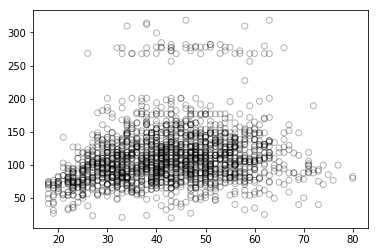

In [10]:
data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()


What are your thoughts on the above scatter plot? Is it positively, negatively or not correlated at all? Please share your thoughts in the comments section below.

## Introduction to Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is a supervised learning algorithm for solving regression based tasks.
It is called a linear model as it establishes a linear relationship between the dependent and independent variables. It basically gives us a linear equation like the one below where we have our features as independent variables with coefficients:


Here, we have Y as our dependent variable, the X’s are the independent variables and all betas are the coefficients. Coefficients are the weights assigned to the features. They signify the importance of each of the features. For example, if the outcome of an equation is highly dependent upon one feature (X1) as compared to any other feature, it means the coefficient/weight of the feature (X1) would have a higher magnitude as compared to any other feature.
So, let’s try to understand linear regression with only one feature, i.e., only one independent variable. It is called Simple Linear Regression. Therefore, our equation becomes,


As we are using only ‘age’ to predict the ‘wages’ of the employees, we will implement simple linear regression on the training dataset and calculate the error (RMSE) on the validation dataset.

In [11]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

[ 0.72190831]
80.6528774076


C:\Users\zolivier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


C:\Users\zolivier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


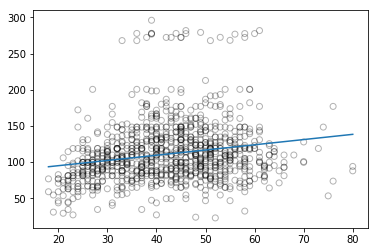

In [12]:
# Prediction on validation dataset
valid_x = valid_x.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


We can now calculate the RMSE on the predictions.

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)


40.436687488017256


We can infer from the above graph that linear regression is not capturing all the signals available and is not the best method for solving this wage prediction.
Although linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference, they have significant limitations in terms of predictive power. This is because they assume the linear combination between the dependent and independent variables which is almost always an approximation, and sometimes a poor one.
In the other methods we will see below, we will set aside the linearity assumption while still attempting to maintain as much interpretability as possible. We will do this by examining very simple extensions of linear models like polynomial regression and step functions, as well as more sophisticated approaches such as splines.

## Improvement over Linear Regression: Polynomial Regression
Consider these visualisations –

The plots above seem to be using a lot more signals between wage and age as compared to the linear plot. These plots are not linear in shape, hence they use a non-linear equation instead of a linear equation for establishing the relationship between age and wage. This type of regression technique, which uses a non linear function, is called Polynomial regression.
Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables , as predictors. This approach provides a simple way to provide a non-linear fit to data.
The standard method to extend linear regression to a non-linear relationship between the dependent and independent variables, has been to replace the linear model with a polynomial function.

As we increase the power value, the curve obtained contains high oscillations which will lead to shapes that are over-flexible. Such curves lead to over-fitting.

[ -0.05194765   5.22868974 -10.03406116]


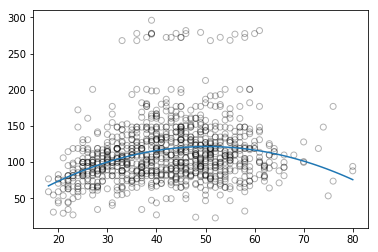

In [16]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()